<a href="https://colab.research.google.com/github/jogapritam/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Jogapritam_Sahu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [ ]:
# Lets make handshake of note book with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/2nd project ML/data_cardiovascular_risk.csv')

In [ ]:
# Checking dimension of data set 
df.shape

(3390, 17)

In [ ]:
# First look of our data 

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Checking column names

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Brief description of our data set

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# lets check the duplicate
len(df[df.duplicated()])

0

In [ ]:
#Check for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

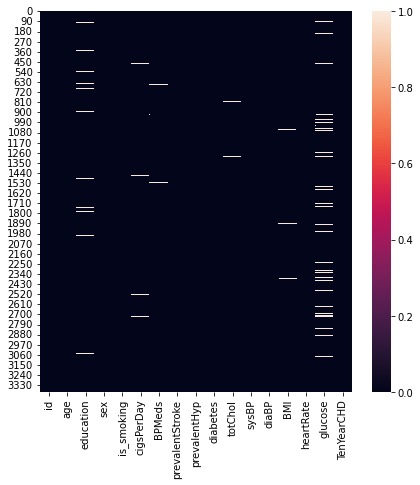

In [ ]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

In [ ]:
df.dropna(inplace=True)

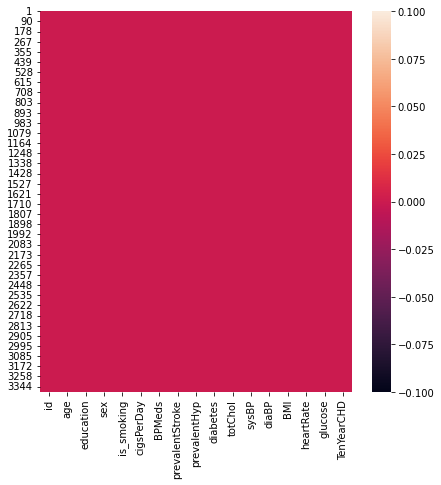

In [ ]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

Let's Check for outliers

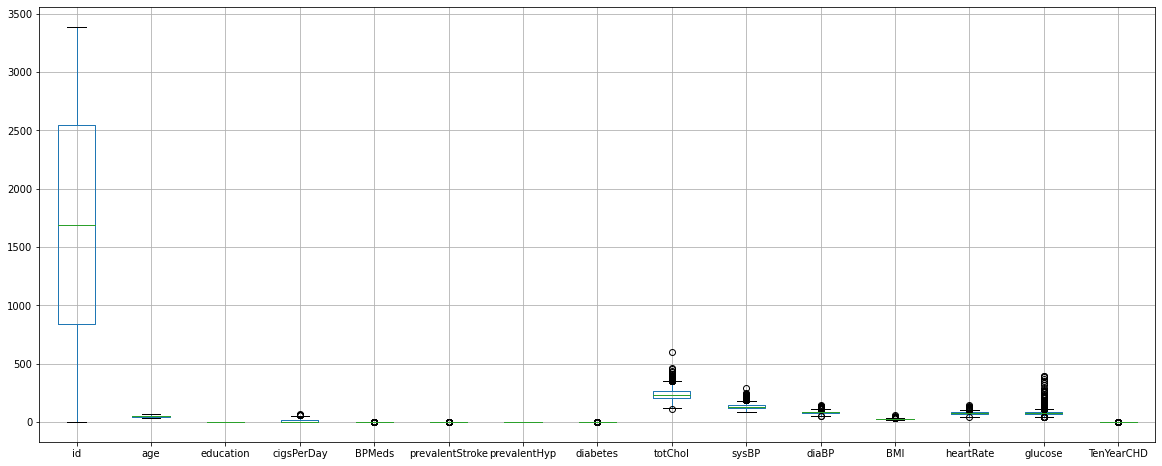

In [ ]:
plt.figure(figsize=(20,8))
df.boxplot()

There are outliers in some features.

Let's check the correlation between the feature.

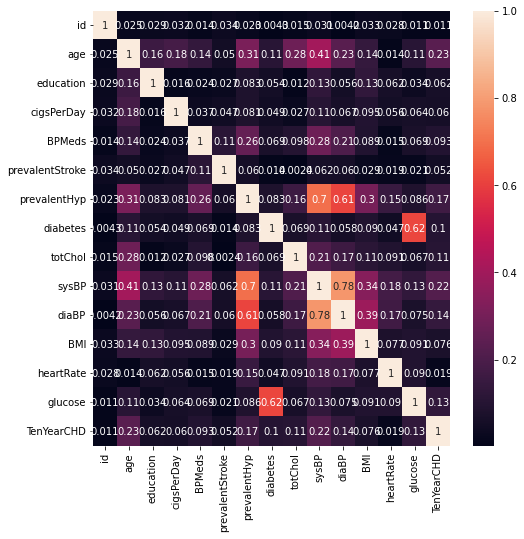

In [ ]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)


There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables

# ***Analysis of Categorical features***

In [ ]:
df['sex'].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

Let's check which gender is more prone to heart disease

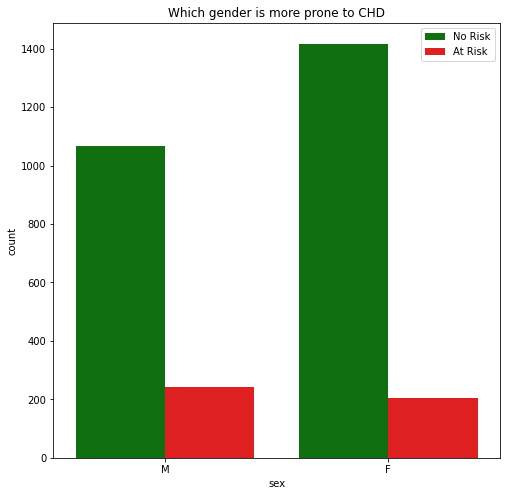

In [ ]:
my_palette = {0 : 'green' , 1 : 'red'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (8,8))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It is showing that out of 1307 male around 200 males are having heart disease and out of 1620 females around 200 females are having heart disease. It is indicating that males and females with almost coressponding 15% and 12% are suffering from heart disease.

Diabetes analysis

In [ ]:
df['diabetes'].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [ ]:
df.groupby(['diabetes','sex','TenYearCHD'])['TenYearCHD'].count()

diabetes  sex  TenYearCHD
0         F    0             1388
               1              190
          M    0             1045
               1              225
1         F    0               29
               1               13
          M    0               21
               1               16
Name: TenYearCHD, dtype: int64

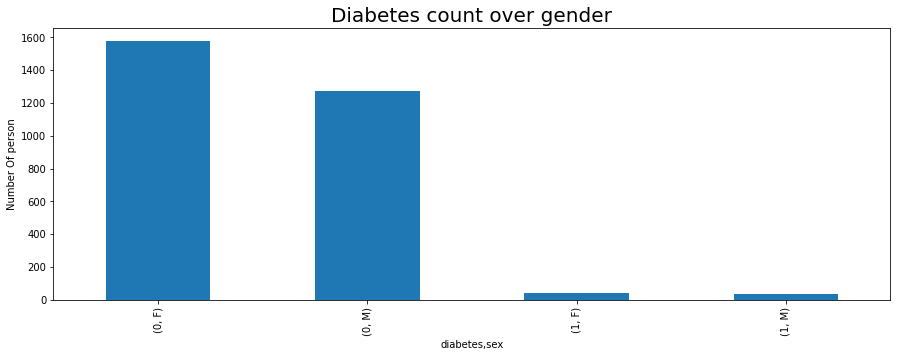

In [ ]:
diabetes_Count=df.groupby(['diabetes','sex'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
diabetes_Count.plot(kind='bar')
plt.title('Diabetes count over gender',size=20)
plt.ylabel('Number Of person')
plt.show()

It is showing that out of 79 diabetes patients 42 are female and 37 male.

Smoking wise risk analysis

In [ ]:
df['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

In [ ]:
df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

is_smoking  sex  TenYearCHD
NO          F    0             857
                 1             125
            M    0             416
                 1              82
YES         F    0             560
                 1              78
            M    0             650
                 1             159
Name: TenYearCHD, dtype: int64

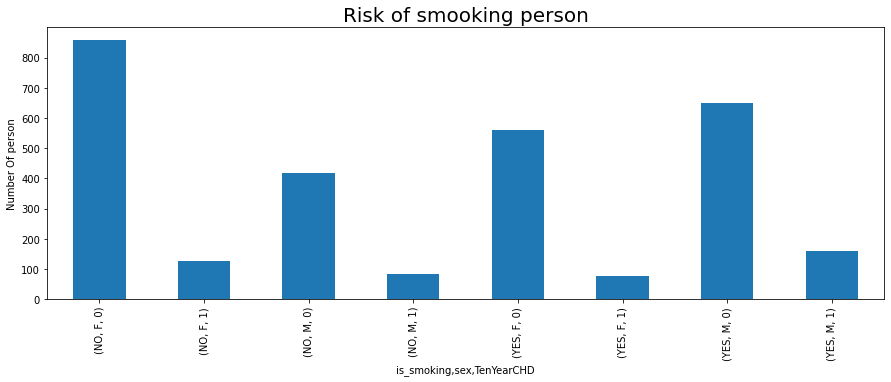

In [ ]:
smooking_effect=df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
smooking_effect.plot(kind='bar')
plt.title('Risk of smooking person',size=20)
plt.ylabel('Number Of person')
plt.show()

In this dataset out of 1447 smooking persons, total 237 persons are affected by heart disease and out of them 78 are female and 159 are male.

Hypertension wise risk analysis

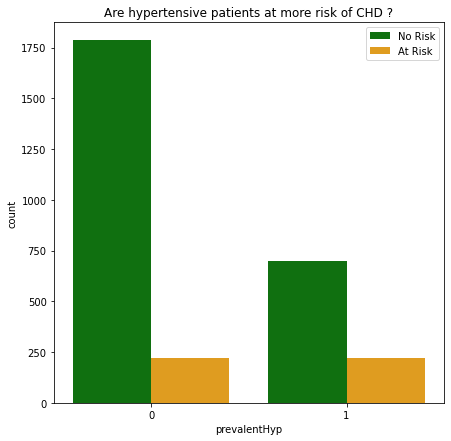

In [ ]:
plt.figure(figsize = (7,7))
my_palette = {0 : 'green' , 1 : 'orange'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From this plot we can say that there is a chance of having heart disease of a person who is going through hypertension, which is an obvious thing.


Blood pressure wise risk analysis

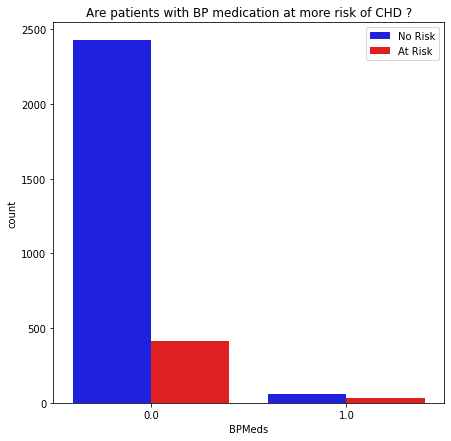

In [ ]:
my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (7,7))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients with BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

This plot showing that if a person is going through bp, then there is a higher chance of having a heart disease.

Risk analysis of smookers

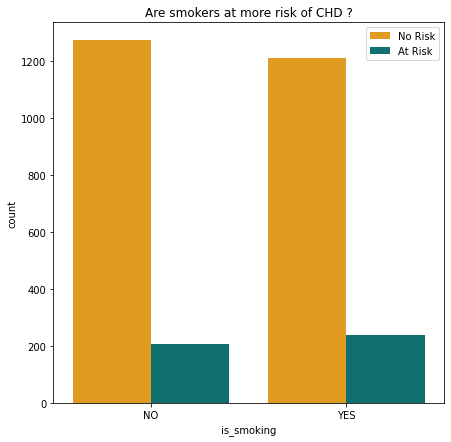

In [ ]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (7,7))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From this plot we can say that persons who are not smookers also at risk of having CHD.

Age wise Analysis

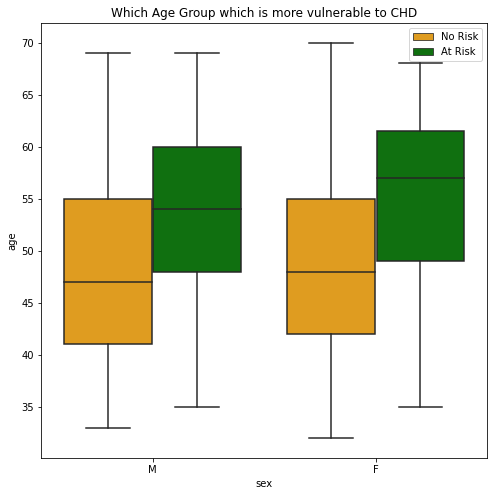

In [ ]:
my_palette = {0 : 'orange' , 1 : 'green'}
plt.figure(figsize = (8,8))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

This plot showing that both males and females of age between 50-60 are at risk zone of having CHD.

Heart rate Wise risk analysis

In [ ]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [ ]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

In [ ]:
df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

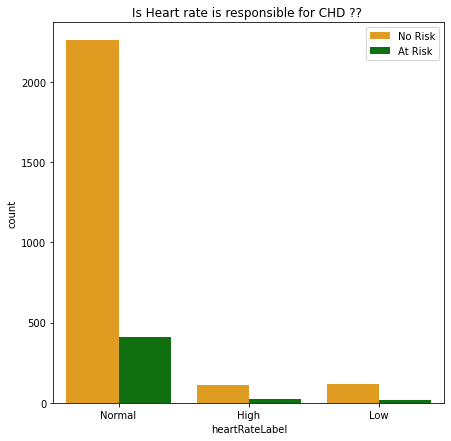

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

There are some normal heart rated persons having heart disease.

In [ ]:
df.drop(columns=['heartRateLabel'], inplace=True)


Earlier Heart stroke wise analysis

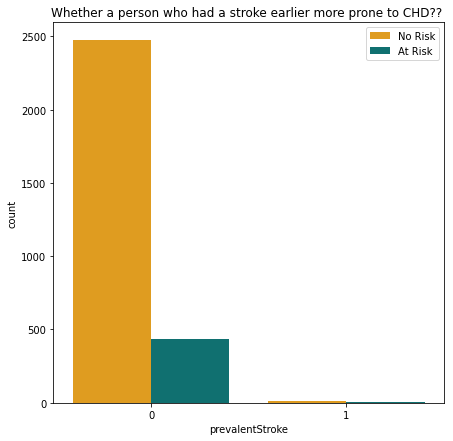

In [ ]:
plt.figure(figsize = (7,7))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

Some persons who did not had a stroke earlier also in some sorts of having CHD.

Blood pressure wise analysis

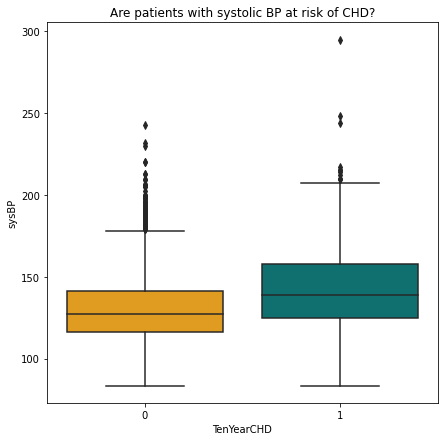

In [ ]:
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['sysBP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

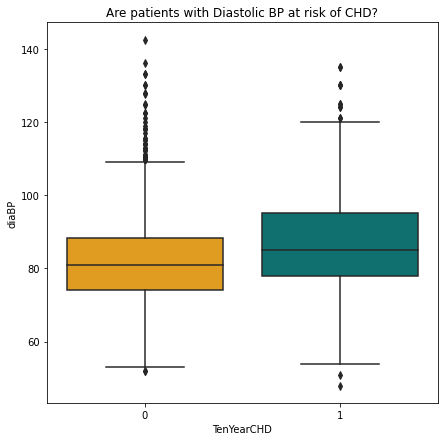

In [ ]:
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['diaBP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

It seems that both numbers are equally important in monitoring heart issues.

# ***Feature Engineering***

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension

In [ ]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [ ]:
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7


Blood glucose levels can be used to classify the severity of Diabetes

In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [ ]:
df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1


In [ ]:
# remove unnecessary features
df.drop(columns=['id','prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking'], inplace=True)


In [ ]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,M,0.0,0.0,0,212.0,29.77,72.0,0,5,1
2,46,1.0,F,10.0,0.0,0,250.0,20.35,88.0,0,1,1
3,50,1.0,M,20.0,0.0,0,233.0,28.26,68.0,1,3,1
4,64,1.0,F,30.0,0.0,0,241.0,26.42,70.0,0,2,1
5,61,3.0,F,0.0,0.0,0,272.0,32.80,85.0,1,7,1


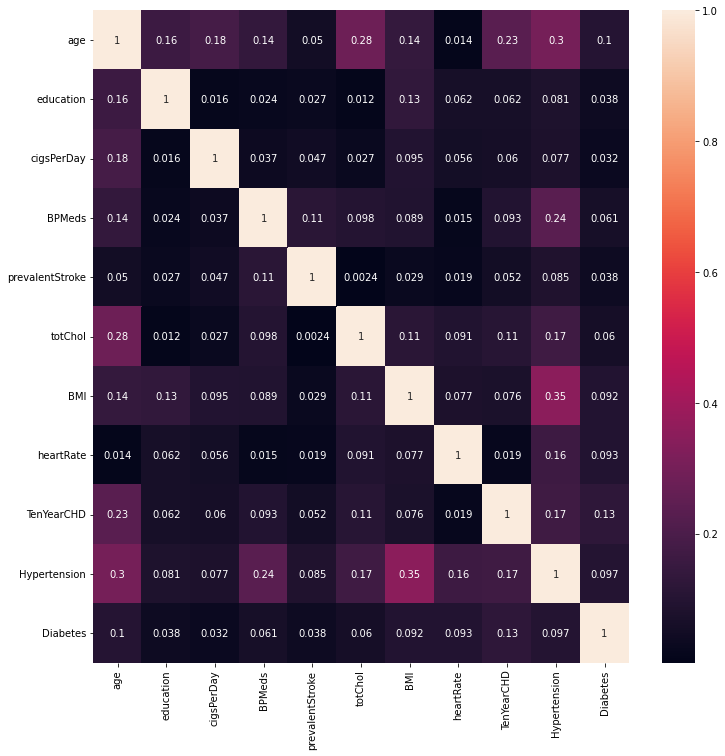

In [ ]:
# Let's check the correlation using heatmap
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

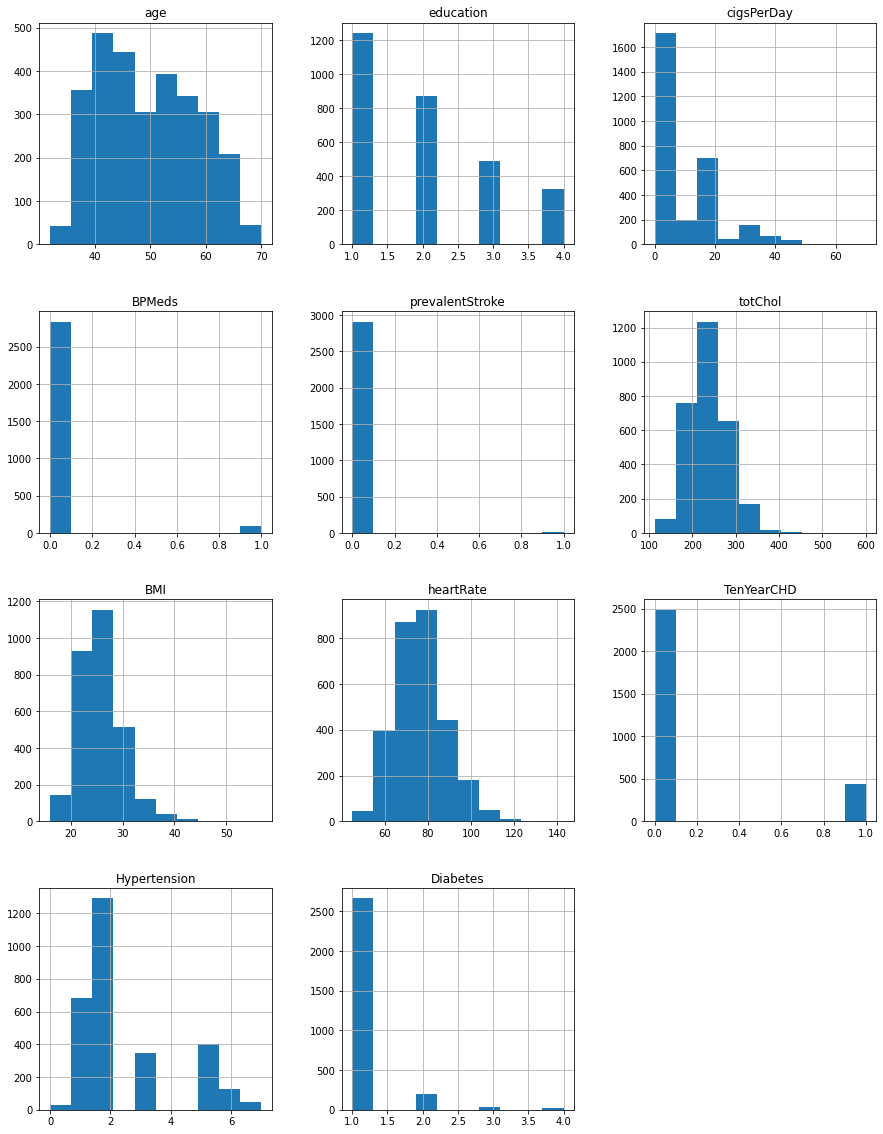

In [ ]:
# Let's plot histogram to check the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
# remove not useful columns
df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [ ]:
df.head()

,age,education,sex,cigsPerDay,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,M,0.0,212.0,29.77,72.0,0,5,1
2,46,1.0,F,10.0,250.0,20.35,88.0,0,1,1
3,50,1.0,M,20.0,233.0,28.26,68.0,1,3,1
4,64,1.0,F,30.0,241.0,26.42,70.0,0,2,1
5,61,3.0,F,0.0,272.0,32.80,85.0,1,7,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2927 non-null   int64  
 1   education     2927 non-null   float64
 2   sex           2927 non-null   object 
 3   cigsPerDay    2927 non-null   float64
 4   totChol       2927 non-null   float64
 5   BMI           2927 non-null   float64
 6   heartRate     2927 non-null   float64
 7   TenYearCHD    2927 non-null   int64  
 8   Hypertension  2927 non-null   int64  
 9   Diabetes      2927 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 331.5+ KB


Let's convert categorical data to numerical

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
df.head()

,age,education,sex,cigsPerDay,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,1,0.0,212.0,29.77,72.0,0,5,1
2,46,1.0,0,10.0,250.0,20.35,88.0,0,1,1
3,50,1.0,1,20.0,233.0,28.26,68.0,1,3,1
4,64,1.0,0,30.0,241.0,26.42,70.0,0,2,1
5,61,3.0,0,0.0,272.0,32.80,85.0,1,7,1


In [ ]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes']


In [ ]:
X = df[independent_variable].values
y = df[dependent_variable].values

SMOTE

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [ ]:
#Let's split our data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [ ]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# ***LogisticRegression***

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#Check ourmodel coefficients
logistic_regression_model.coef_

array([[ 0.65453375, -0.11521702,  0.26456528,  0.23421932,  0.16633043,
        -0.04393997, -0.01567907,  0.29815175,  0.28356143]])

In [ ]:
#Check the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
#Check the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6824286513710128
The accuracy on test data is  0.6599552572706935


[[1496  502]
 [ 633  943]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

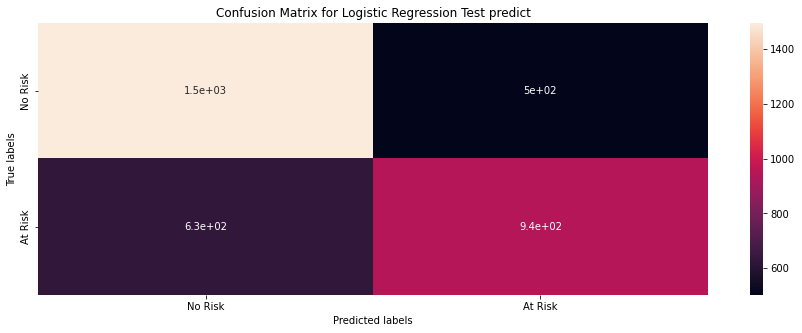

In [57]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[353 131]
 [173 237]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

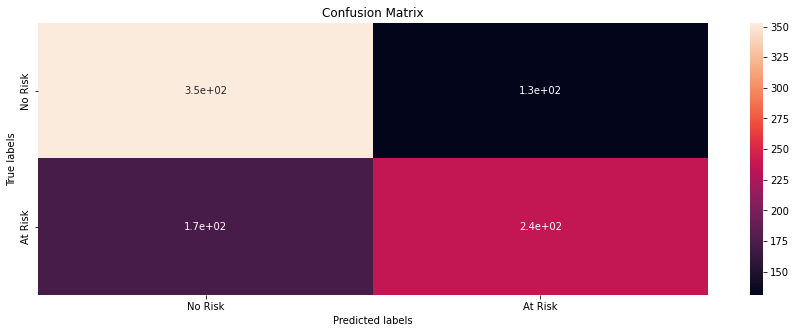

In [58]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [59]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6536938117315058
Accuracy score: 0.6599552572706935
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1998
           1       0.65      0.60      0.62      1576

    accuracy                           0.68      3574
   macro avg       0.68      0.67      0.67      3574
weighted avg       0.68      0.68      0.68      3574



              precision    recall  f1-score   support

           0       0.67      0.73      0.70       484
           1       0.64      0.58      0.61       410

    accuracy                           0.66       894
   macro avg       0.66      0.65      0.65       894
weighted avg       0.66      0.66      0.66       894



## ***K-Nearest Neighbour***

In [63]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)

In [64]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.97034135 0.90654729 0.9037493  0.87213206 0.86038053
 0.84023503 0.83212087 0.82344712 0.81505316]
Test Accuracy:  [0.86800895 0.84340045 0.80425056 0.80760626 0.79977629 0.80089485
 0.78187919 0.78970917 0.77293065 0.78411633]


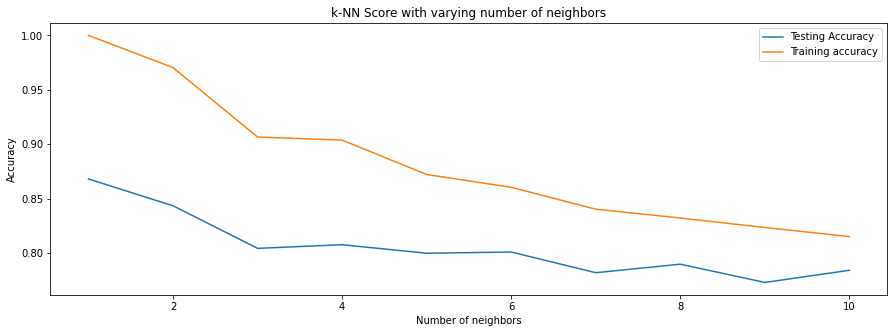

In [65]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Let's find the best parameter

In [66]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [67]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
knn_cv.best_score_

0.8413531566472742

In [69]:
knn_cv.best_params_

{'n_neighbors': 1}

In [70]:
#Let's check predictions
knn_predict = knn_cv.predict(X_test)


In [71]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       484
           1       0.82      0.92      0.86       410

    accuracy                           0.87       894
   macro avg       0.87      0.87      0.87       894
weighted avg       0.87      0.87      0.87       894

